#Завдання на використання Pandas + SQL

В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робили в попередній домашці:

In [2]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 49.8 MB/s eta 0:00:00


In [3]:
import mysql.connector
print("MySQL Connector installed successfully!")

try:
    con = mysql.connector.connect(
        user='user1',
        password='7oygWy6P',
        host='3.68.62.36',
        database='employees'
    )
    print("Successfully connected to the database!")

except mysql.connector.Error as err:
    print(f"Error: {err}")


MySQL Connector installed successfully!
Successfully connected to the database!


1. Виведіть кількість співробітників за роком, в який вони були найняті (hire_date) використовуючи pandas.read_sql. Запишіть результат в змінну df та виведіть значення змінної на екран.

In [18]:
import pandas as pd
import mysql.connector

# Step 1.
query = """
SELECT
    YEAR(hire_date) as hire_year,
    COUNT(*) as emp_num
FROM employees
GROUP BY YEAR(hire_date)
ORDER BY hire_year;
"""

# Step 2. Using existing connection with cursor
cursor = con.cursor()
cursor.execute(query)
results = cursor.fetchall()

# Step 3. Create DataFrame from results
df = pd.DataFrame(results, columns=['hire_year', 'emp_num'])

df = df.reset_index(drop=True)

print(df)

cursor.close()


    hire_year  emp_num
0        1985    35316
1        1986    36150
2        1987    33501
3        1988    31436
4        1989    28394
5        1990    25610
6        1991    22568
7        1992    20402
8        1993    17772
9        1994    14835
10       1995    12115
11       1996     9574
12       1997     6669
13       1998     4155
14       1999     1514
15       2000       13


True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1JmyPlxFwRRxuCJ33VN-AqMDPSdV_DPXI)

2. Виведіть лінійний графік залежності кількості найманих співробітників від року найму. Ми ж не просто так дані з бази дістали :)
Перейменувати назви колонок датафрейму можна або методами pandas, або в sql запиті в попередньому завданні. Також, аби графік вийшов правильний, треба відсортувати роки за зростанням. І це також можна зробити або в pandas, або в SQL.

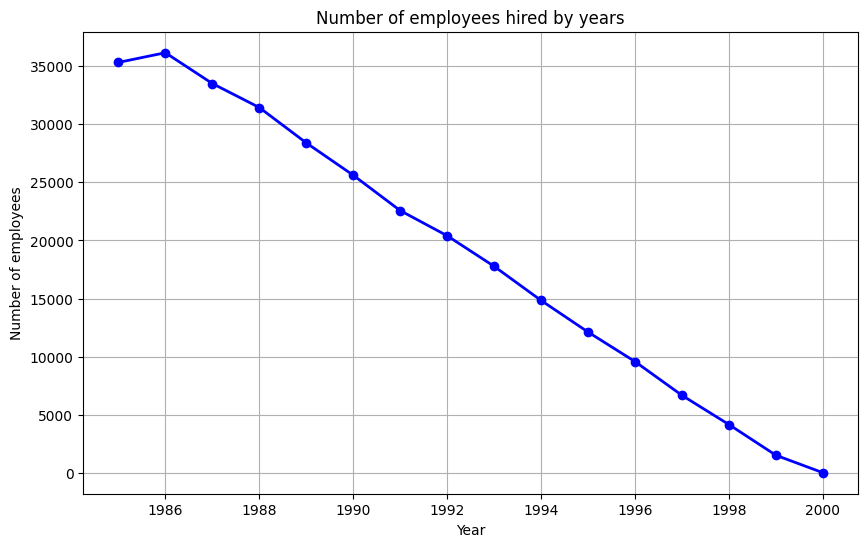

In [19]:
# Solution 1.
import matplotlib.pyplot as plt

# Step 1. Sort values by hire_year if not already sorted
df = df.sort_values('hire_year')

# Step 2. Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df['hire_year'], df['emp_num'],
         marker='o',  # Add points at each data point
         color='blue',
         linewidth=2)

# Step 3. Add labels and title
plt.title('Number of employees hired by years')
plt.xlabel('Year')
plt.ylabel('Number of employees')

# Step 4. Add grid
plt.grid(True)

# Step 5. Show plot
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1vXUpPNNvIL5dxsypr9sklvtq-H-NDwzU)

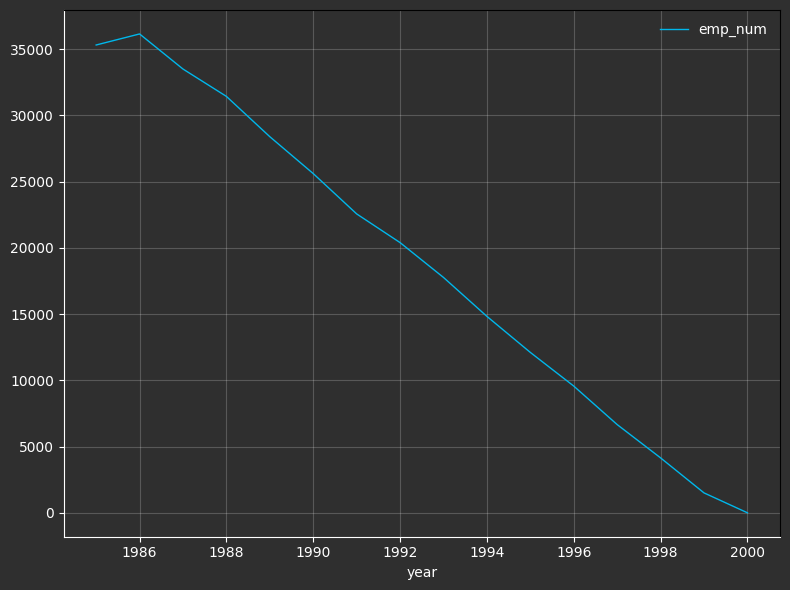

True

In [20]:
# Solution 2.
import pandas as pd
import matplotlib.pyplot as plt

# Step 1. SQL query with sorting
query = """
SELECT
    YEAR(hire_date) as year,
    COUNT(*) as cnt
FROM employees
GROUP BY YEAR(hire_date)
ORDER BY year ASC;
"""

# Step 2. Execute query and create DataFrame
cursor = con.cursor()
cursor.execute(query)
results = cursor.fetchall()
df = pd.DataFrame(results, columns=['year', 'cnt'])

# Step 3. Create figure
plt.figure(figsize=(8, 6), facecolor='#2F2F2F')
ax = plt.gca()
ax.set_facecolor('#2F2F2F')

# Step 4. Create the line plot
plt.plot(df['year'], df['cnt'],
         color='#00B7EB',
         linewidth=1,
         label='emp_num')

# Step 5. Customize grid
plt.grid(True, linestyle='-', alpha=0.2, color='white')

# Step 6. Customize axes
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

# Step 7. Set labels
plt.xlabel('year', color='white')
plt.ylabel('', color='white')

# Step 8. Add legend
plt.legend(frameon=False, loc='upper right', labelcolor='white')

# Step 9. Adjust layout
plt.tight_layout()

# Step 10. Show plot
plt.show()

cursor.close()


3. З допомогою SQL для робітників позиції `Engineer`, які вже не працюють в компанії (тобто у них є значення to_date, яке заповнено НЕ значенням за замовчанням) знайдіть кількість повних років перебування на позиції. Позиція зберігається в колонці `title` в таблиці `titles`. Кількість років перебування на позиції можна отримати наприклад з використанням функції `timestampdiff`. Ознайомтесь з її використанням в [документації](https://dev.mysql.com/doc/refman/8.0/en/date-and-time-functions.html#function_timestampdiff).

Результат запишіть в змінну `df_years` та виведіть цю змінну на екран.

In [23]:
import pandas as pd

query = """
SELECT
    TIMESTAMPDIFF(YEAR, from_date, to_date) as duration,
    from_date,
    to_date
FROM titles
WHERE title = 'Engineer'
AND to_date != '9999-01-01'
ORDER BY duration, from_date;
"""

cursor = con.cursor()
cursor.execute(query)
results = cursor.fetchall()
df_years = pd.DataFrame(results, columns=['duration', 'from_date', 'to_date'])

print(df_years)
print(f"\n{df_years.shape[0]} rows × {df_years.shape[1]} columns")

cursor.close()


       duration   from_date     to_date
0             0  1985-02-04  1985-09-26
1             0  1985-02-07  1985-12-13
2             0  1985-02-10  1985-03-11
3             0  1985-02-15  1986-01-20
4             0  1985-02-17  1985-03-01
...         ...         ...         ...
84015         9  1993-07-31  2002-07-31
84016         9  1993-08-01  2002-08-01
84017         9  1993-08-01  2002-08-01
84018         9  1993-08-01  2002-08-01
84019         9  1993-08-01  2002-08-01

[84020 rows x 3 columns]

84020 rows × 3 columns


True

Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1nBqeBVYFuSQlMx9lNaDJJ_8hMx7yV9bX)

4. Використовуючи дані в  `df_years`, побудуйте гістограму кількості років, протягом яких люди з назвою позиції `Engineer` перебували на позиції. Не забудьте дати назву діаграмі, а також підписати вісі.

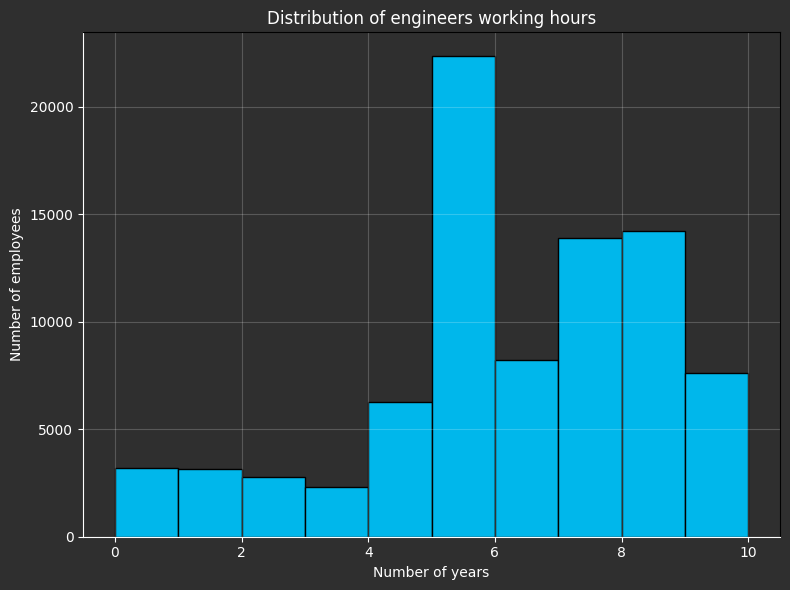

In [26]:
import matplotlib.pyplot as plt

# Step 1. Create figure with dark background
plt.figure(figsize=(8, 6), facecolor='#2F2F2F')
ax = plt.gca()
ax.set_facecolor('#2F2F2F')

# Step 2. Create histogram
plt.hist(df_years['duration'],
         bins=range(0, max(df_years['duration'])+2, 1),  # bins from 0 to max+1 by 1
         color='#00B7EB',
         edgecolor='black')

# Step 3. Customize grid
plt.grid(True, linestyle='-', alpha=0.2, color='white')

# Step 4. Customize axes
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.tick_params(colors='white')

# Step 5. Set labels and title
plt.title('Distribution of engineers working hours', color='white')
plt.xlabel('Number of years', color='white')
plt.ylabel('Number of employees', color='white')

# Step 6. Adjust layout
plt.tight_layout()

# Step 7. Show plot
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1RKbfs5R9oniNs9XJcUpdlXFT-0BKXvPB)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [27]:
con.close()